# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [6]:
dateparse = lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S%z")  # pd.datetime.strptime

core_users_clustering = pd.read_csv("../data/core_users_clustering.csv",
                    parse_dates=['created_at'],
                    converters={"user_id": str})

In [7]:
core_users_clustering_copy = core_users_clustering.copy()

## K-Means

C:\Users\davis\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


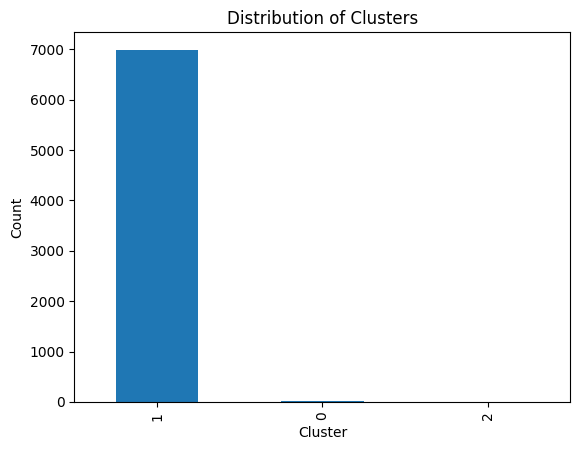

In [11]:
# Seleziona le caratteristiche da utilizzare per il clustering
features = ['nbr_followers', 'nbr_tweets', 'following_ratio', 'favorites_ratio', 'tweet_ratio']

# Normalizza le caratteristiche
core_users_normalized = (core_users_clustering[features] - core_users_clustering[features].mean()) / core_users_clustering[features].std()

# Sostituisci i valori mancanti con 0
core_users_normalized = core_users_normalized.fillna(0)

# Esegui il clustering K-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(core_users_normalized)

# Aggiungi le etichette dei cluster ai dati
core_users_clustering['cluster'] = kmeans.labels_

# Visualizza la distribuzione dei cluster
core_users_clustering['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.show()


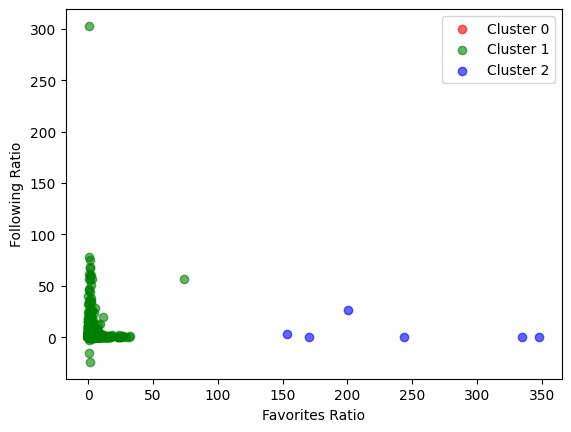

In [9]:
# Assegna ad ogni cluster un colore
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()

# Crea uno scatter plot per ogni cluster
for i in range(len(core_users_clustering['cluster'].unique())):
    cluster_data = core_users_clustering[core_users_clustering['cluster'] == i]
    ax.scatter(cluster_data['favorites_ratio'], cluster_data['following_ratio'], c=colors[i], label=f'Cluster {i}', alpha=0.6)

ax.set_xlabel('Favorites Ratio')
ax.set_ylabel('Following Ratio')
ax.legend()

plt.show()


### K-Means with 2 clusters

## DBSCAN

In [10]:
# Prendiamo le due colonne di interesse: 'retweet_ratio' e 'following_ratio'
data = core_users_clustering[['retweet_ratio', 'following_ratio']]

# Rimpiazziamo i valori infiniti con NaN, e poi eliminiamo le righe con valori NaN
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Ridimensioniamo i dati per avere media 0 e varianza 1, ciò è importante per DBSCAN
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Eseguiamo DBSCAN sui dati
db = DBSCAN(eps=0.3, min_samples=10).fit(data_scaled)

# Otteniamo le etichette dei cluster (usiamo .labels_ per accedere a queste)
core_users_clustering['cluster'] = db.labels_

# Visualizziamo i risultati
plt.figure(figsize=(10, 7))
plt.scatter(core_users_clustering['retweet_ratio'], core_users_clustering['following_ratio'], c=core_users_clustering['cluster'])
plt.xlabel('Retweet Ratio')
plt.ylabel('Following Ratio')
plt.title('DBSCAN Clustering')
plt.show()

ValueError: Length of values (6149) does not match length of index (7010)